# MEDICAL IMAGE PROCESSING WITH MATLAB & PYTHON

## imports

In [1]:
import numpy as np
import pandas as pd
import cv2
import matlab
import matlab.engine
import matplotlib.pyplot as plt

%matplotlib inline

## start matlab engine

In [2]:
eng = matlab.engine.start_matlab()

## read images with opencv

In [3]:
img_1 = cv2.imread('../data/microbiology.png', cv2.IMREAD_GRAYSCALE)
img_2 = cv2.imread('../data/breast.png', cv2.IMREAD_GRAYSCALE)
img_3 = cv2.imread('../data/chest.jpg', cv2.IMREAD_GRAYSCALE)
img_4 = cv2.imread('../data/pathology.jpg', cv2.IMREAD_GRAYSCALE)
img_5 = cv2.imread('../data/kidney.png', cv2.IMREAD_GRAYSCALE)
img_6 = cv2.imread('../data/skin.jpg', cv2.IMREAD_GRAYSCALE)

img_m_1 = matlab.uint8(img_1)
img_m_2 = matlab.uint8(img_2)
img_m_3 = matlab.uint8(img_3)
img_m_4 = matlab.uint8(img_4)
img_m_5 = matlab.uint8(img_5)
img_m_6 = matlab.uint8(img_6)

imgs = [img_m_1, img_m_2, img_m_3, img_m_4, img_m_5, img_m_6]

rows = 6
columns = 10

## multithresh : Multilevel image thresholds using Otsu’s method

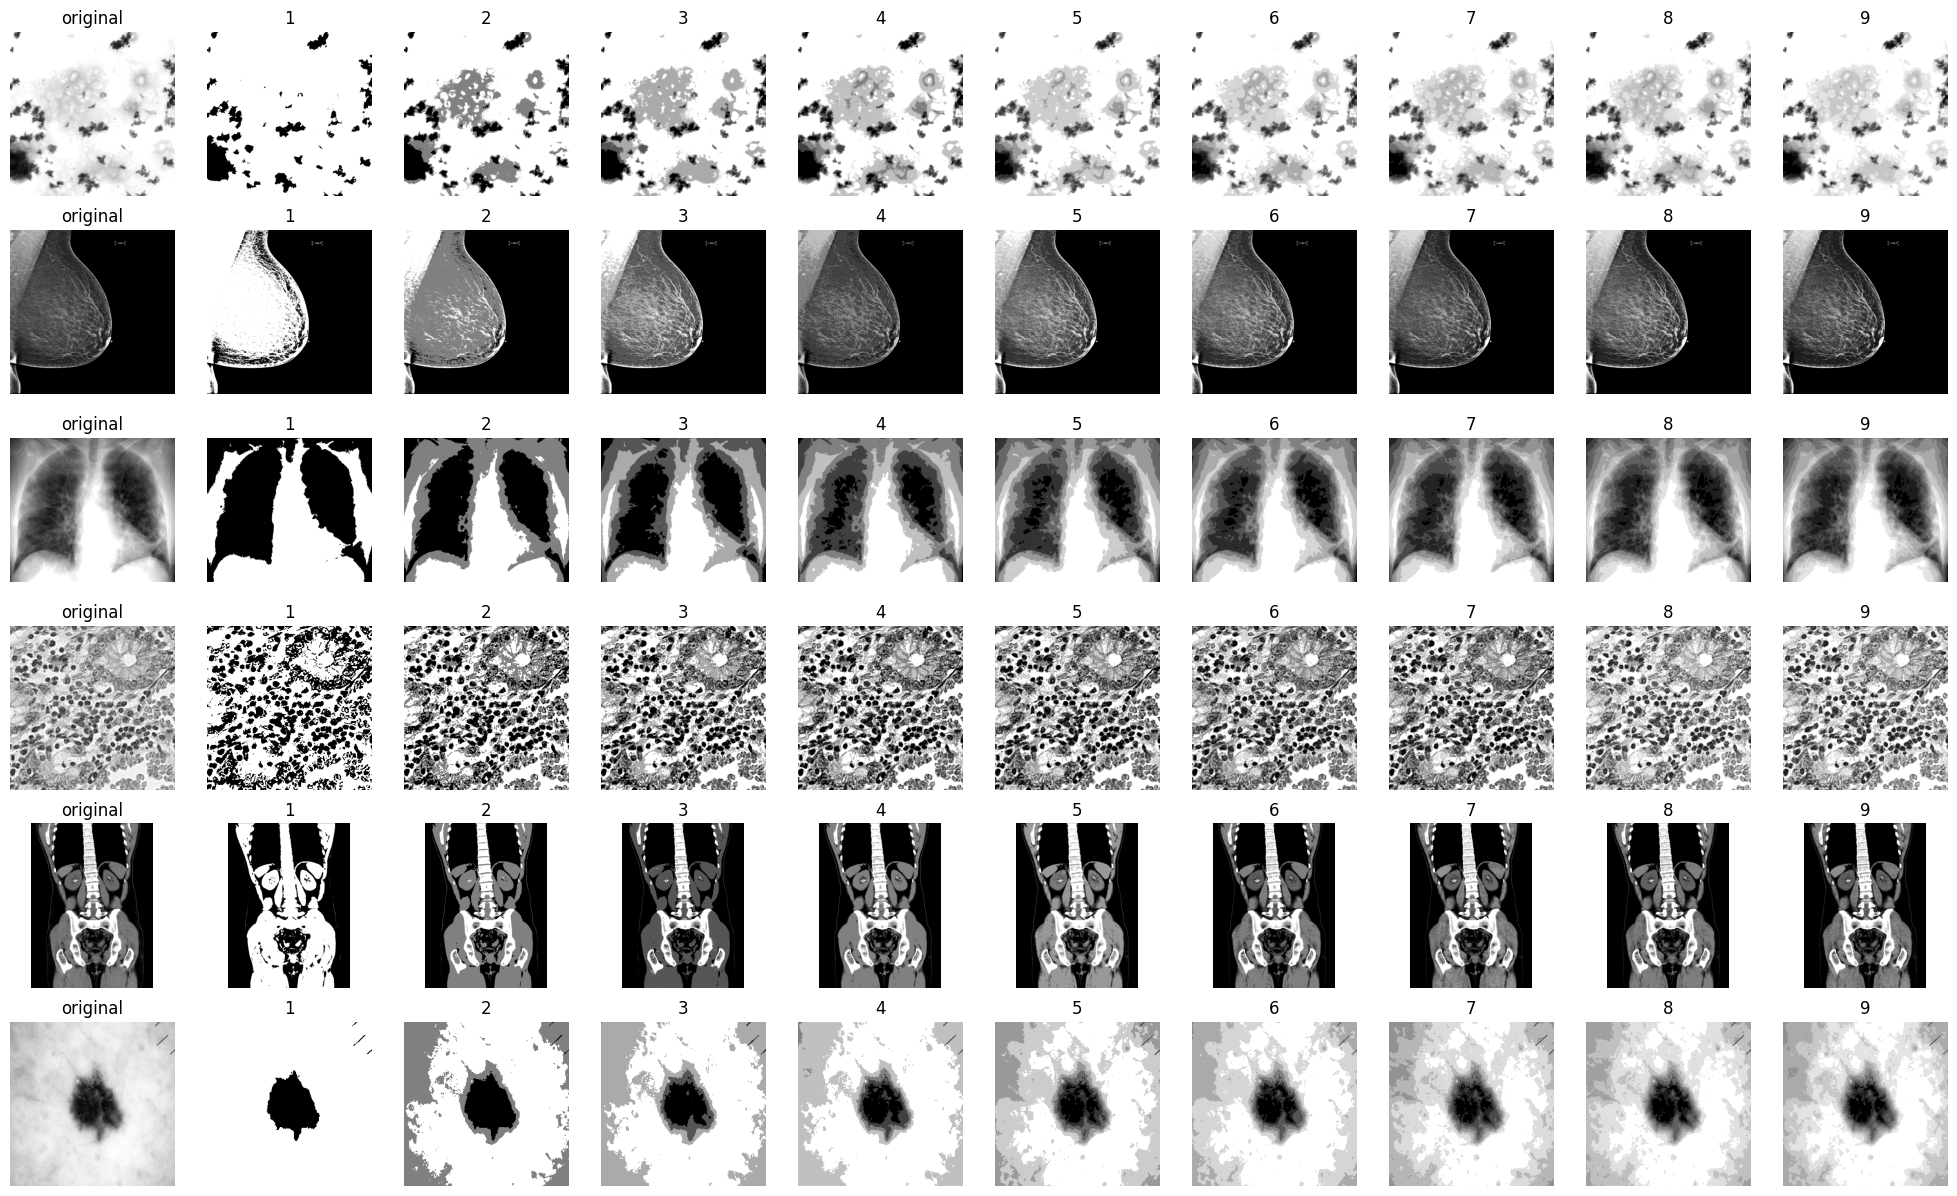

In [4]:
img_list = []
param_list = []
for i in range(0, len(imgs)):
    img_list.append(imgs[i])
    for k in range(1, 10):
        param = k
        param_list.append(param)
        img_list.append(eng.func_multithresh(imgs[i], param))

fig = plt.figure(figsize=(25, 15))
for i in range(0, len(img_list)):
    fig.add_subplot(rows, columns, i + 1)
    plt.axis('off')
    plt.imshow(img_list[i], cmap='gray')
    if i % 10 !=0:
        plt.title(str(param_list[(i-1)%10]))
    else:
        plt.title('original')

## adaptthresh : Adaptive image threshold using local first-order statistics

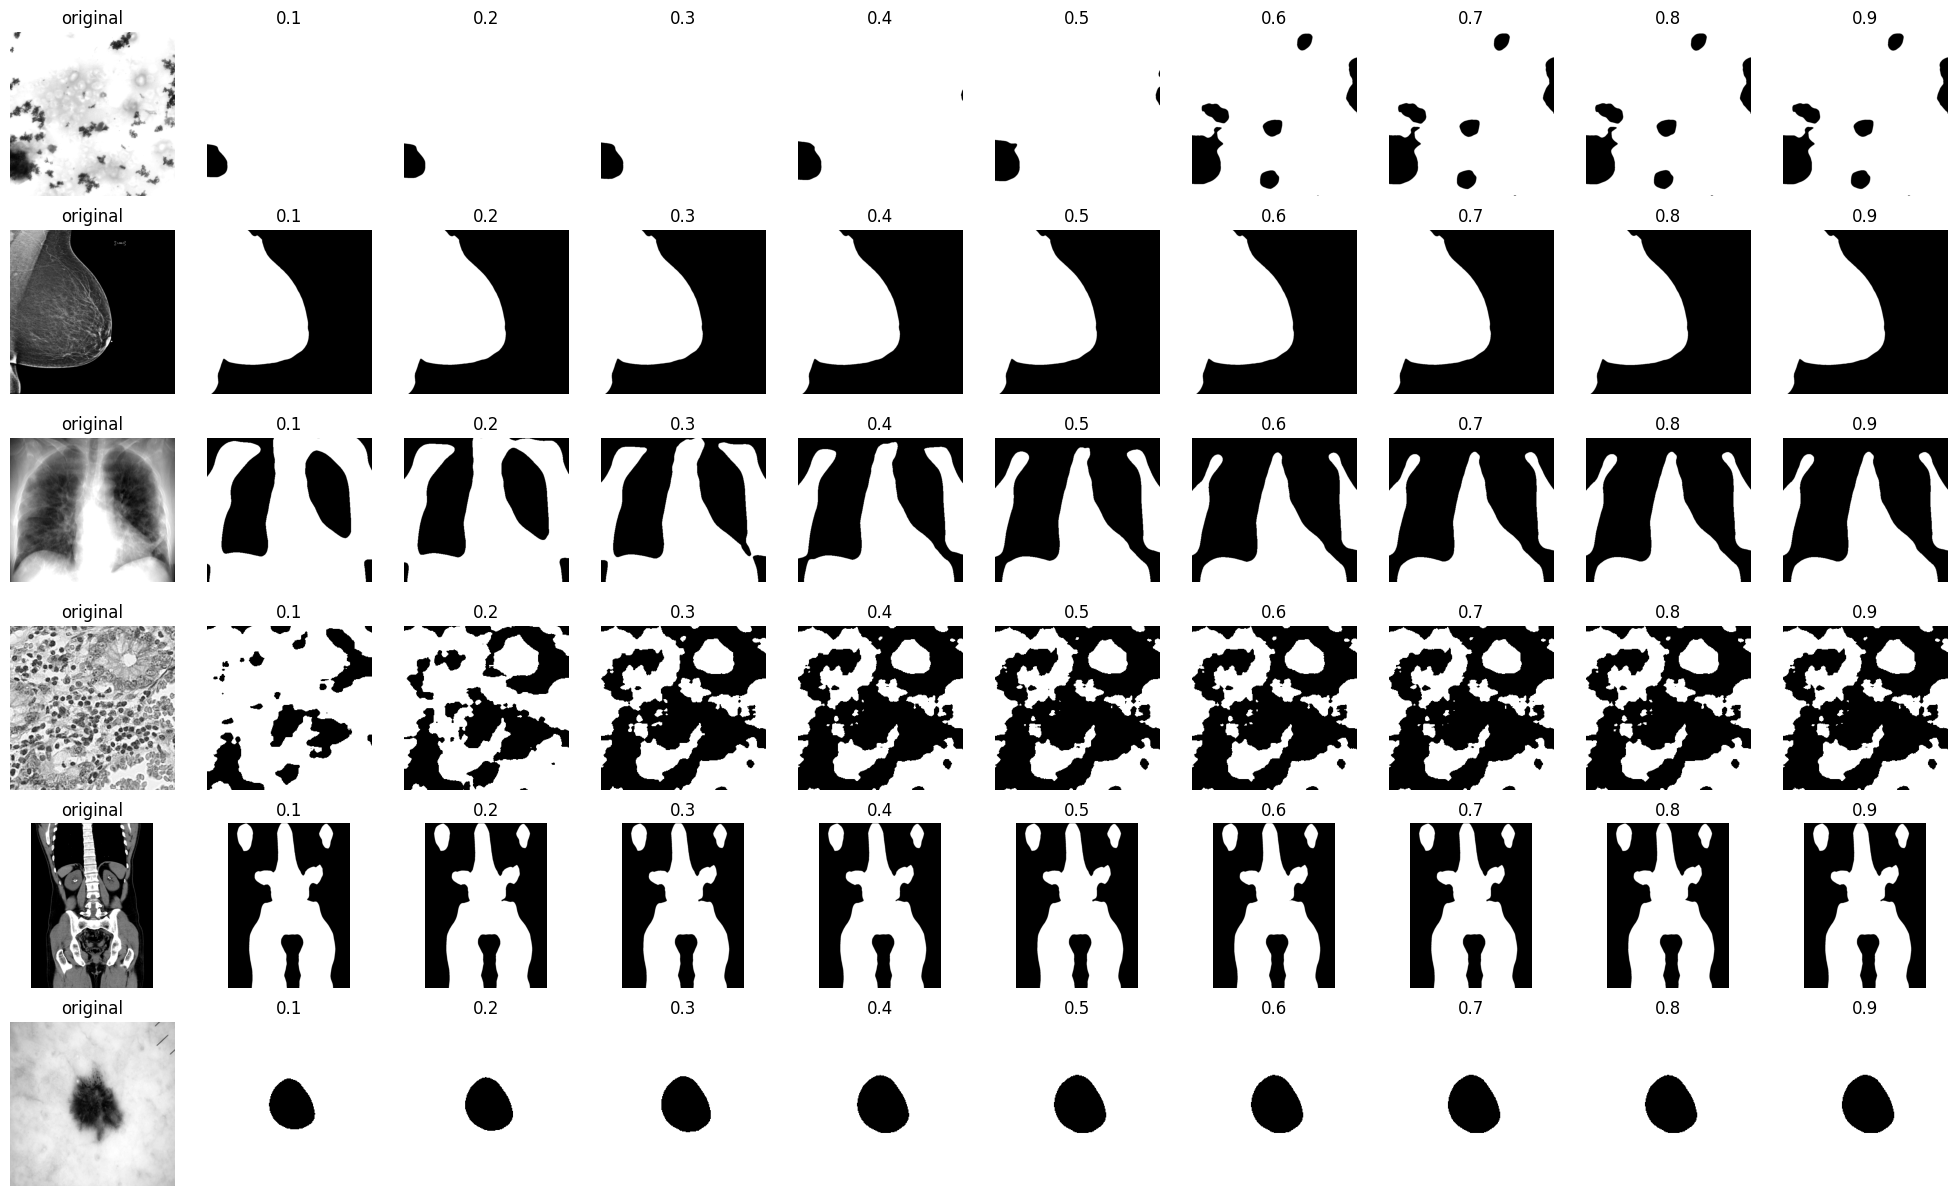

In [5]:
img_list = []
param_list = []
for i in range(0, len(imgs)):
    img_list.append(imgs[i])
    for k in range(1, 10):
        param = k / 10.
        param_list.append(param)
        img_list.append(eng.func_adaptthresh(imgs[i], param))

fig = plt.figure(figsize=(25, 15))
for i in range(0, len(img_list)):
    fig.add_subplot(rows, columns, i + 1)
    plt.axis('off')
    plt.imshow(img_list[i], cmap='gray')
    if i % 10 !=0:
        plt.title(str(param_list[(i-1)%10]))
    else:
        plt.title('original')

## imsegkmeans : K-means clustering based image segmentation

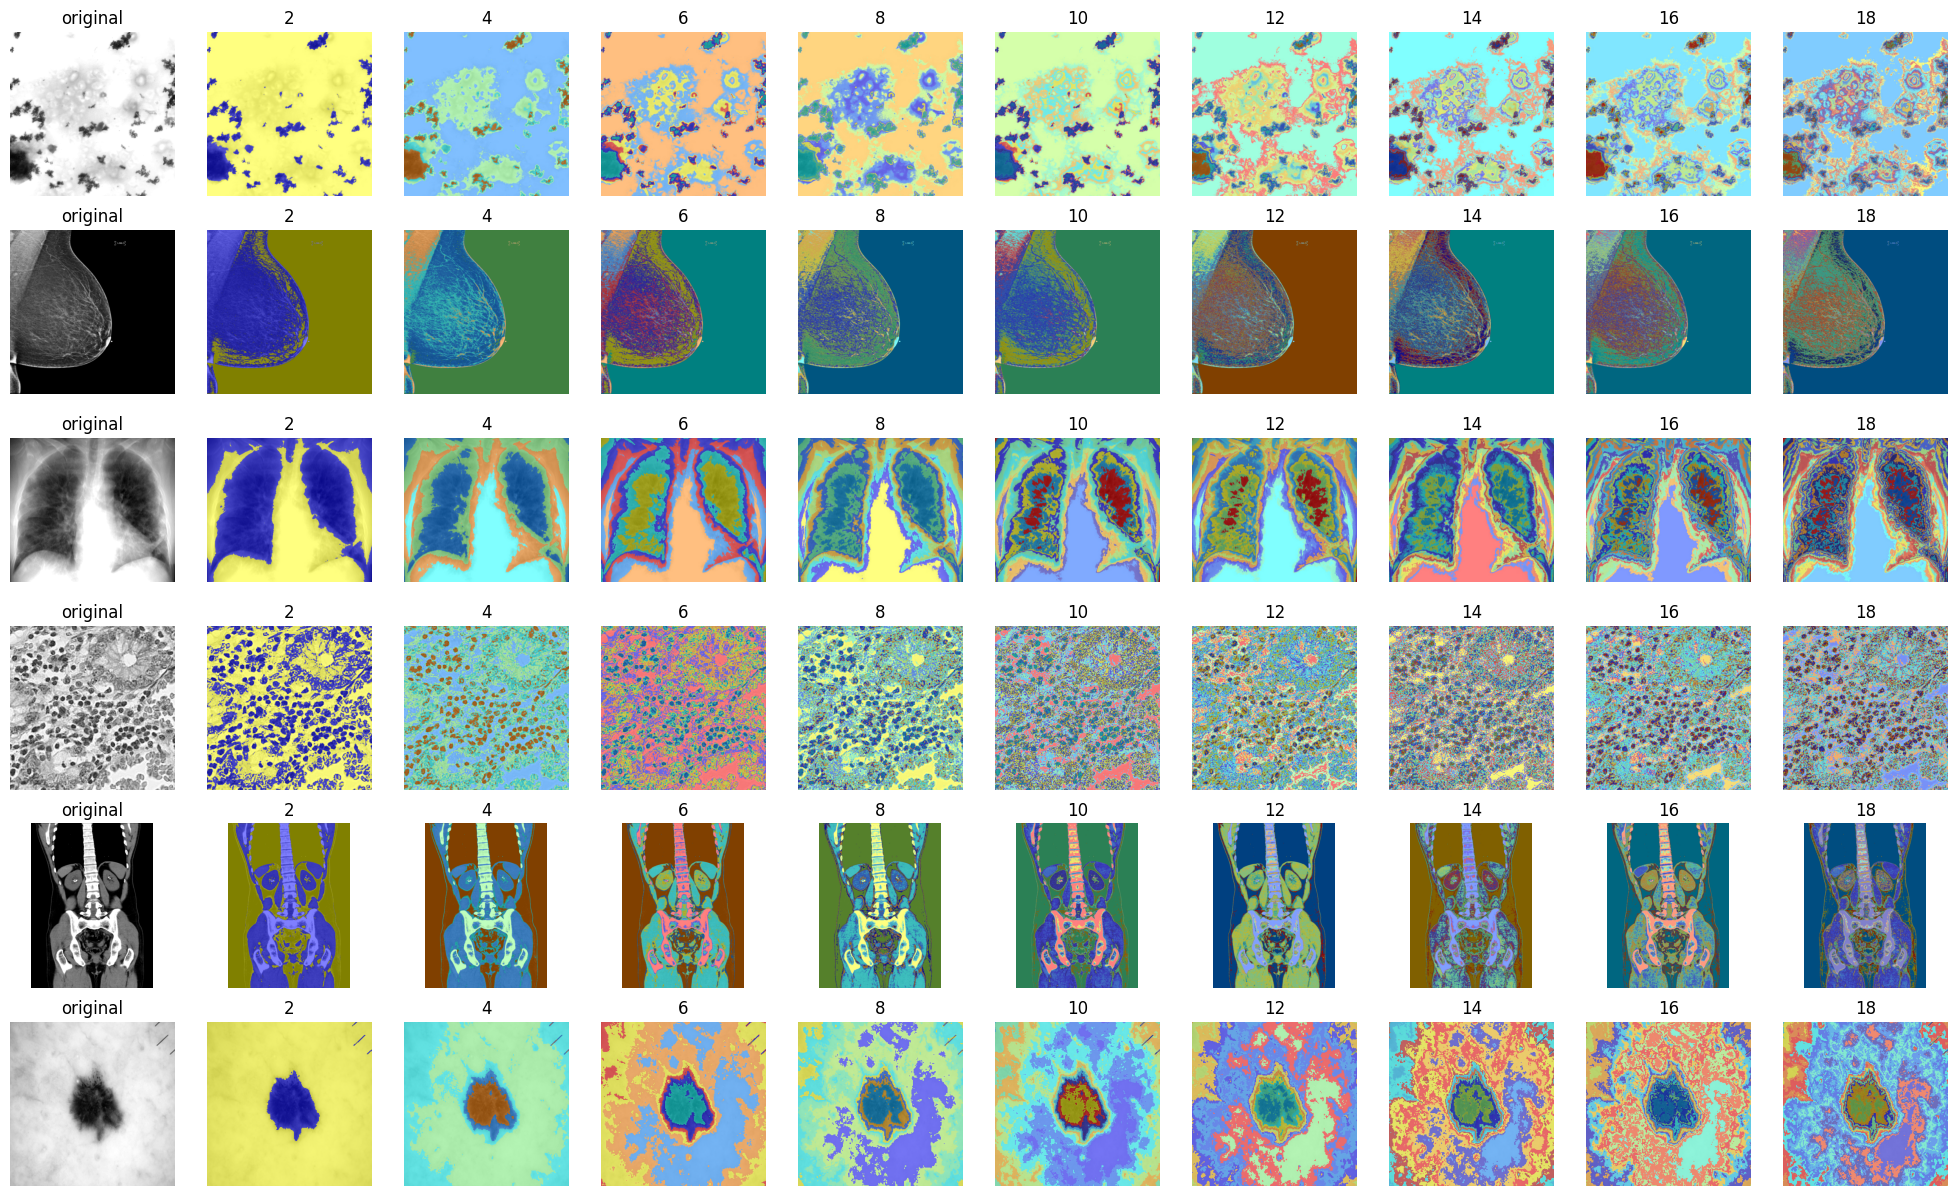

In [6]:
img_list = []
param_list = []
for i in range(0, len(imgs)):
    img_list.append(imgs[i])
    for k in range(1, 10):
        param = k * 2
        param_list.append(param)
        img_list.append(eng.func_imsegkmeans(imgs[i], param))

fig = plt.figure(figsize=(25, 15))
for i in range(0, len(img_list)):
    fig.add_subplot(rows, columns, i + 1)
    plt.axis('off')
    plt.imshow(img_list[i], cmap='gray')
    if i % 10 !=0:
        plt.title(str(param_list[(i-1)%10]))
    else:
        plt.title('original')

## superpixels : 2-D superpixel oversegmentation of images

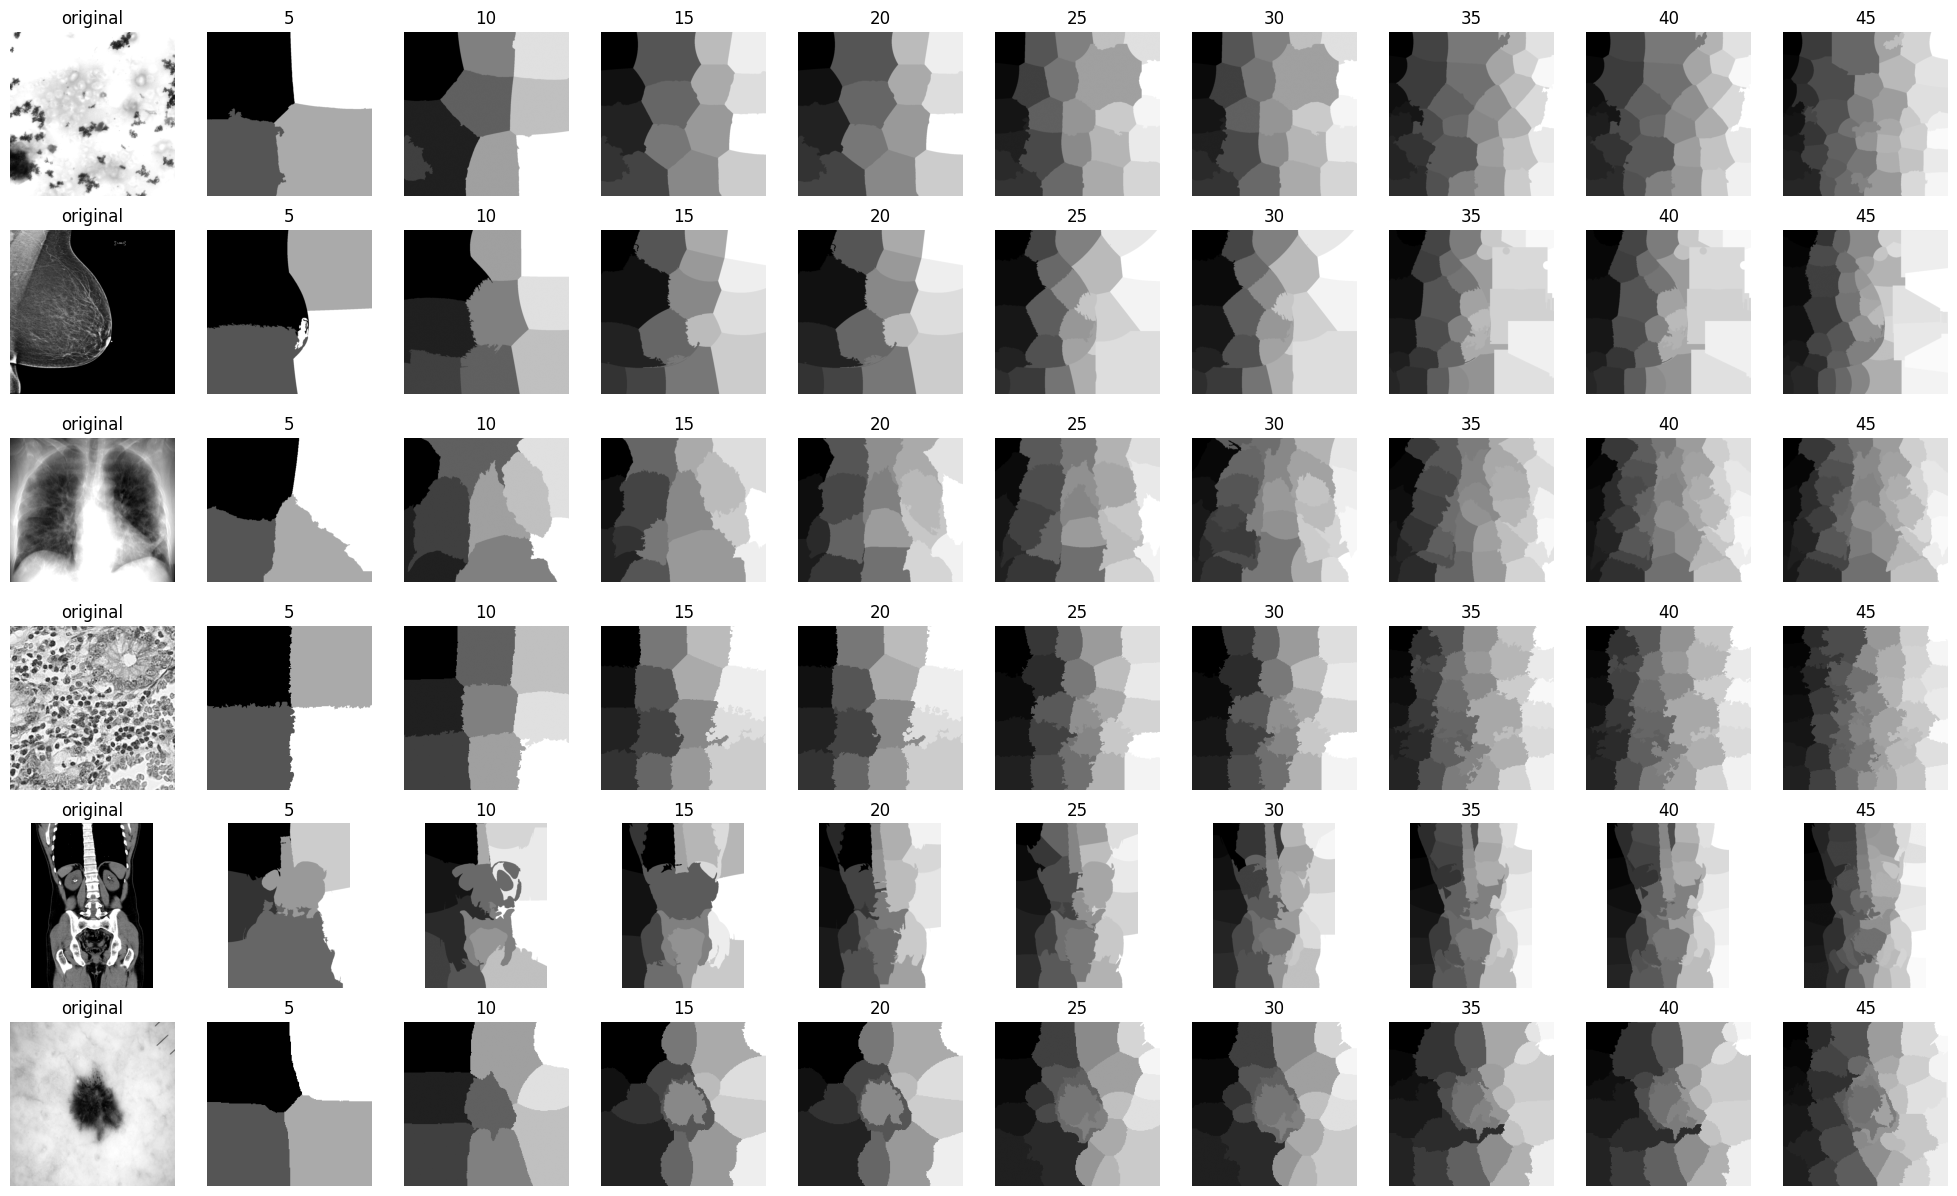

In [7]:
img_list = []
param_list = []
for i in range(0, len(imgs)):
    img_list.append(imgs[i])
    for k in range(1, 10):
        param = k * 5
        param_list.append(param)
        img_list.append(eng.func_superpixels(imgs[i], param))

fig = plt.figure(figsize=(25, 15))
for i in range(0, len(img_list)):
    fig.add_subplot(rows, columns, i + 1)
    plt.axis('off')
    plt.imshow(img_list[i], cmap='gray')
    if i % 10 !=0:
        plt.title(str(param_list[(i-1)%10]))
    else:
        plt.title('original')

## end

In [8]:
eng.quit()